In [1]:
#Importing all required libraries

import os
import zipfile
import random
import shutil
!pip install -q kaggle
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras
import matplotlib.pyplot as plt
import requests
import cv2
import urllib
import numpy as np
import scipy
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.regularizers import l2
from keras import regularizers
from keras.models import Model
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.layers import Dense, Flatten, concatenate, Lambda
from keras.utils import to_categorical
from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical as hot
from keras.layers import Dense, Dropout, BatchNormalization,Activation
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.optimizers import Adam
from tensorflow.image import resize
from keras.callbacks import LearningRateScheduler
from tensorflow.keras.utils import plot_model
from google.colab import files 
from PIL import Image
from io import BytesIO
from google.colab.patches import cv2_imshow
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.nasnet import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from glob import glob
import scipy
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
!pip install split-folders

import splitfolders


# Checking TF version
print(tf. __version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.12.0


# **Preparing the data**

Data di ambil dari kaggle, kemudian di sesuaikan format label nya dan masing masing jumlah nya di batasi agar data tidak imbalance dan tidak terjadi overfitting.


In [2]:
# Connecting the Kaggle API
!mkdir ~/.kaggle
!echo '{"username":"fandynovanto","key":"e3334581d15e96b9743393f4f46509ce"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
# dataset kaggle  di download.

# !kaggle datasets download -d ma7555/cat-breeds-dataset -p /tmp
!kaggle datasets download -d denispotapov/cat-breeds-dataset-cleared -p /tmp
!kaggle datasets download -d fandynovanto/doggy-heiwan -p /tmp
!kaggle datasets download -d shawngano/gano-cat-breed-image-collection -p /tmp
!kaggle datasets download -d gpiosenka/100-bird-species -p /tmp

100% 1.82G/1.82G [01:27<00:00, 22.7MB/s]
100% 1.82G/1.82G [01:27<00:00, 22.2MB/s]
100% 750M/750M [00:38<00:00, 22.8MB/s]
100% 750M/750M [00:38<00:00, 20.5MB/s]
100% 253M/254M [00:12<00:00, 21.9MB/s]
100% 254M/254M [00:12<00:00, 21.2MB/s]
100% 1.95G/1.96G [01:48<00:00, 20.1MB/s]
100% 1.96G/1.96G [01:48<00:00, 19.3MB/s]


In [4]:
#Extract the dataset

zip1 = '/tmp/cat-breeds-dataset-cleared.zip'
zip2 = '/tmp/100-bird-species.zip'
zip3 = '/tmp/doggy-heiwan.zip'
zip4 = '/tmp/gano-cat-breed-image-collection.zip'

zip_ref1 = zipfile.ZipFile(zip1, 'r')
zip_ref2 = zipfile.ZipFile(zip2, 'r')
zip_ref3 = zipfile.ZipFile(zip3, 'r')
zip_ref4 = zipfile.ZipFile(zip4, 'r')

zip_ref1.extractall('/content/cat')
zip_ref2.extractall('/content/bird')
zip_ref3.extractall('/content/')
zip_ref4.extractall('/content/15cats')

In [5]:
# kumpulan fungsi untuk preprocessing 
# rename untuk label 
def rename_dir(path):
  for file in os.listdir(path):
      os.rename(path + file, path + file.title())

def limit_file_count(directory, limit):
  files = os.listdir(directory)
  if len(files) >= limit:
      excess_files = files[limit:]
      for file in excess_files:
          file_path = os.path.join(directory, file)
          if os.path.isfile(file_path):
              os.remove(file_path)
              # print(f"File {file_path} telah dihapus.")#menampilkan nama file yang di hapus
      # print(f"Total file yang dihapus: {len(excess_files)}"#menampilkan total akhir file yang di hapus
  elif  len(files) < limit:
    shutil.rmtree(directory)
    print(f"Removed the {directory}")
  else:
    print("data sudah balance")

      
def limit_isi(directories):
  limit = 120
  # Mendapatkan daftar direktori dalam images
  directories = [f.path for f in os.scandir(directories) if f.is_dir()]
  # Menampilkan jumlah file dalam setiap direktori
  for directory in directories:
      file_count = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))])
      # print(directory)
      limit_file_count(directory, limit)

def cek_isi_dir(directories):
  directories = [f.path for f in os.scandir(directories) if f.is_dir()]
  for directory in directories:
      file_count = len([f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]) 
      print(f"Jumlah file dalam direktori {directory}: {file_count}")


In [6]:
target=['/content/cat/dataset/images/', '/content/doggy/images/Images/' , '/content/15cats/Gano-Cat-Breeds-V1_1/', '/content/bird/train/']

# , '/content/bird/train/'
for dir in target:
  rename_dir(dir)
  limit_isi(dir)
  cek_isi_dir(dir)

Removed the /content/cat/dataset/images/Cymric
Removed the /content/cat/dataset/images/Silver
Removed the /content/cat/dataset/images/Selkirk Rex
Removed the /content/cat/dataset/images/Javanese
Removed the /content/cat/dataset/images/Chausie
Removed the /content/cat/dataset/images/York Chocolate
Removed the /content/cat/dataset/images/Chartreux
Removed the /content/cat/dataset/images/Chinchilla
Removed the /content/cat/dataset/images/Oriental Long Hair
Removed the /content/cat/dataset/images/Canadian Hairless
Removed the /content/cat/dataset/images/Laperm
Removed the /content/cat/dataset/images/Oriental Tabby
Removed the /content/cat/dataset/images/Burmilla
Removed the /content/cat/dataset/images/Pixiebob
Removed the /content/cat/dataset/images/American Wirehair
Removed the /content/cat/dataset/images/Ocicat
Removed the /content/cat/dataset/images/Devon Rex
Removed the /content/cat/dataset/images/Korat
Removed the /content/cat/dataset/images/Japanese Bobtail
Removed the /content/cat/d

### **NOW WE CHECK ALL THE LABELS PROVIDED IN EACH DATASET** 

In [7]:
#Checking the name of each type dir
cat_labels = os.listdir('/content/cat/dataset/images/')
print(cat_labels)

['Domestic Short Hair', 'Russian Blue', 'Tortoiseshell', 'Scottish Fold', 'Bombay', 'Persian', 'Siamese', 'Egyptian Mau', 'Birman', 'Bengal', 'Nebelung', 'Dilute Calico', 'Siberian', 'Tabby', 'Munchkin', 'Himalayan', 'Domestic Long Hair', 'Ragamuffin', 'Tiger', 'Burmese', 'Balinese', 'Havana', 'Tonkinese', 'Norwegian Forest Cat', 'Snowshoe', 'American Bobtail', 'Turkish Angora', 'Dilute Tortoiseshell', 'Maine Coon', 'American Curl', 'Manx', 'British Shorthair', 'Domestic Medium Hair', 'Turkish Van', 'American Shorthair', 'Cornish Rex', 'Oriental Short Hair', 'Torbie', 'Ragdoll', 'Calico', 'Applehead Siamese', 'Abyssinian', 'Exotic Shorthair', 'Tuxedo', 'Extra-Toes Cat - Hemingway Polydactyl', 'Sphynx - Hairless Cat']


In [8]:
#Checking the name of each type dir
dog_labels = os.listdir('/content/doggy/images/Images/')
print(dog_labels)

['Pug', 'Staffordshire Bullterrier', 'Malinois', 'West Highland White Terrier', 'Siberian Husky', 'African Hunting Dog', 'Irish Wolfhound', 'Cocker Spaniel', 'Sussex Spaniel', 'Pomeranian', 'Affenpinscher', 'Bedlington Terrier', 'English Springer', 'Groenendael', 'Curly Coated Retriever', 'German Short Haired Pointer', 'Irish Setter', 'Afghan Hound', 'Pembroke', 'Miniature Pinscher', 'Redbone', 'Japanese Spaniel', 'Tibetan Terrier', 'Kelpie', 'Otterhound', 'Irish Terrier', 'Brabancon Griffon', 'Weimaraner', 'Blenheim Spaniel', 'Borzoi', 'Saint Bernard', 'Boston Bull', 'Malamute', 'Shetland Sheepdog', 'Clumber', 'Norfolk Terrier', 'Norwich Terrier', 'Doberman', 'Tibetan Mastiff', 'Briard', 'Scottish Deerhound', 'Toy Poodle', 'Pekinese', 'Kerry Blue Terrier', 'Boxer', 'Chow', 'Wire Haired Fox Terrier', 'Toy Terrier', 'Standard Poodle', 'German Shepherd', 'American Staffordshire Terrier', 'Bernese Mountain Dog', 'Chihuahua', 'Sealyham Terrier', 'Labrador Retriever', 'Greater Swiss Mountai

In [9]:
#Checking the name of each type dir
bird_labels = os.listdir('/content/bird/train/')
print(bird_labels)

['Puffin', 'Cream Colored Woodpecker', 'Elliots  Pheasant', 'Scarlet Faced Liocichla', 'Veery', 'Brandt Cormarant', 'Fairy Bluebird', 'Red Billed Tropicbird', 'Squacco Heron', 'Mikado  Pheasant', 'Red Naped Trogon', 'Whimbrel', 'White Eared Hummingbird', 'Brown Noody', 'Rose Breasted Cockatoo', 'Gray Kingbird', 'Gilded Flicker', 'Scarlet Ibis', 'White Tailed Tropic', 'Hepatic Tanager', 'Sandhill Crane', 'Snowy Egret', 'Common Poorwill', 'Cinnamon Teal', 'Golden Cheeked Warbler', 'Purple Finch', 'Kakapo', 'Kiwi', 'Crab Plover', 'Flame Bowerbird', 'Snowy Sheathbill', 'Wattled Curassow', 'Blue Throated Piping Guan', 'Eastern Yellow Robin', 'Iwi', 'Red Crossbill', 'Lazuli Bunting', 'Alberts Towhee', 'American Flamingo', 'White Necked Raven', 'Woodland Kingfisher', 'Blue Throated Toucanet', 'Chinese Pond Heron', 'Green Magpie', 'Says Phoebe', 'Horned Guan', 'Masked Lapwing', 'Phainopepla', 'Malagasy White Eye', 'Mandrin Duck', 'Gold Wing Warbler', 'Puna Teal', 'Ivory Gull', 'Chukar Partridg

Menciptakan directory baru untuk menggabungkan data yang sudah di process

In [10]:
# dataset yang sudah balance di gabung menjadi 1
base_dir="/content/dataset/"
def buat_dir(dir):
    os.makedirs(dir)

buat_dir(base_dir)



In [11]:
def move_subfolders(source_path,destination_path):
  if os.path.exists(source_path):
      # Mendapatkan daftar subfolder di path sumber
      subfolders = next(os.walk(source_path))[1]

      # Memindahkan setiap subfolder ke folder tujuan
      for subfolder in subfolders:
          source_subfolder = os.path.join(source_path, subfolder)
          destination_subfolder = os.path.join(destination_path, subfolder)

          shutil.move(source_subfolder, destination_subfolder)
          #print(f"{source_subfolder} dipindah ke {destination_path}")

      print(f"Pemindahan subfolder {source_path} selesai di pindah ke{destination_path}.")
  else:
      print(f"Path sumber{source_path} tidak ditemukan.")



In [12]:
# Moving specified directory from cats

cats_dir = '/content/cat/dataset/images/'
target_dir = '/content/dataset/'

Lcat = ['Turkish Angora', 'Scottish Fold', 'Himalayan', 'Manx' ]

list_dir = os.listdir(cats_dir)
dest = os.path.join(cats_dir, target_dir) 

for sub_dir in list_dir:
    if sub_dir in Lcat:
        dir_to_move = os.path.join(cats_dir, sub_dir)
        shutil.move(dir_to_move, dest)

In [14]:
# Moving specified directory from cats

birds_dir = '/content/bird/train/'
# target_dir = '/content/dataset/'

Lbird = ['Cockatoo', 'Rose Breasted Cockatoo', 'Gang Gang Cockatoo', 'Rosy Faced Lovebird', 'Canary', 'Zebra Dove', 'Green Winged Dove', 'Mourning Dove',
         'European Turtle Dove', 'Scarlet Crowned Fruit Dove', 'Rock Dove', 'Red Wiskered Bulbul','Double Eyed Fig Parrot', 'Alexandrine Parakeet',
         'Golden Parakeet', 'Jandaya Parakeet', 'Military Macaw', 'Hyacinth Macaw', 'Scarlet Macaw']

list_dir = os.listdir(birds_dir)
dest = os.path.join(birds_dir, target_dir) 

for sub_dir in list_dir:
    if sub_dir in Lbird:
        dir_to_move = os.path.join(birds_dir, sub_dir)
        shutil.move(dir_to_move, dest)

In [15]:
source_path=['/content/15cats/Gano-Cat-Breeds-V1_1/','/content/doggy/images/Images/']
# '/content/cat/dataset/images/'
for i in source_path:
  move_subfolders(i,base_dir)
print("data sudah di pindah ke base_dir")


Pemindahan subfolder /content/15cats/Gano-Cat-Breeds-V1_1/ selesai di pindah ke/content/dataset/.
Pemindahan subfolder /content/doggy/images/Images/ selesai di pindah ke/content/dataset/.
data sudah di pindah ke base_dir


In [16]:
#Splitting the folder

splitfolders.ratio("/content/dataset", output="Data", ratio=(.8, .15, .05), group_prefix=None, move=False)

Copying files: 18960 files [00:07, 2705.45 files/s]


In [17]:
#Checking the label of every classes
data_labels = os.listdir('/content/dataset')
print(data_labels)

['Pug', 'Staffordshire Bullterrier', 'Russian Blue', 'Rose Breasted Cockatoo', 'Malinois', 'West Highland White Terrier', 'Siberian Husky', 'African Hunting Dog', 'Irish Wolfhound', 'Cocker Spaniel', 'Scottish Fold', 'Bombay', 'Persian', 'Siamese', 'Egyptian Mau', 'Sussex Spaniel', 'Pomeranian', 'Affenpinscher', 'Bedlington Terrier', 'English Springer', 'Groenendael', 'Curly Coated Retriever', 'German Short Haired Pointer', 'Birman', 'Irish Setter', 'Afghan Hound', 'Pembroke', 'Bengal', 'Miniature Pinscher', 'Redbone', 'Japanese Spaniel', 'Alexandrine Parakeet', 'Tibetan Terrier', 'Military Macaw', 'Kelpie', 'Otterhound', 'Scarlet Crowned Fruit Dove', 'Irish Terrier', 'Brabancon Griffon', 'Cockatoo', 'Weimaraner', 'Blenheim Spaniel', 'Borzoi', 'Saint Bernard', 'Boston Bull', 'Himalayan', 'Canary', 'Malamute', 'Rosy Faced Lovebird', 'Shetland Sheepdog', 'Clumber', 'Norfolk Terrier', 'Norwich Terrier', 'Doberman', 'Tibetan Mastiff', 'Briard', 'Scottish Deerhound', 'Toy Poodle', 'Pekinese

In [18]:
#Checking the number of classes
label_count = len(data_labels)
print(label_count)

158


In [ ]:
#image_dir = Path(base_dir)

# Get filepaths and labels
#filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.png'))

#labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

#filepaths = pd.Series(filepaths, name='Filepath').astype(str)
#labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
#image_df = pd.concat([filepaths, labels], axis=1)

In [ ]:
#train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=39)

In [19]:
# Preprocessing the images

train_dir = "/content/Data/train/"
val_dir = "/content/Data/val/"
test_dir = "/content/Data/test/"

batch_size = 32
img_size = 299

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=60,
    shear_range=0.3,
    fill_mode='nearest',
#    zca_whitening=True,
#    featurewise_center=True,
    horizontal_flip=True)

#train_datagen.fit(train_dir)

val_datagen = ImageDataGenerator(rescale = 1./255.)
test_datagen = ImageDataGenerator(rescale = 1./255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle = True) # set as training data

validation_generator = val_datagen.flow_from_directory(
    val_dir, 
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle = False) # set as validation data

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='categorical',
    shuffle = False) # set as validation data

Found 15168 images belonging to 158 classes.
Found 2844 images belonging to 158 classes.
Found 948 images belonging to 158 classes.


In [20]:
train_generator[0][0].shape

(32, 299, 299, 3)

In [21]:
img = train_generator[2]
print(img)

(array([[[[0.37637064, 0.3677832 , 0.34350944],
         [0.36633173, 0.3617598 , 0.34150165],
         [0.40172365, 0.40284994, 0.38997257],
         ...,
         [0.99357224, 0.99357224, 0.99357224],
         [0.9921569 , 0.9921569 , 0.9921569 ],
         [0.9921569 , 0.9921569 , 0.9921569 ]],

        [[0.3896615 , 0.37611422, 0.3415329 ],
         [0.38318774, 0.37187344, 0.34487286],
         [0.3731488 , 0.36585006, 0.34286508],
         ...,
         [0.9921569 , 0.9921569 , 0.9921569 ],
         [0.9921569 , 0.9921569 , 0.9921569 ],
         [0.9921569 , 0.9921569 , 0.9921569 ]],

        [[0.40100732, 0.38285664, 0.33848715],
         [0.39375177, 0.37884104, 0.33880606],
         [0.3877284 , 0.37482548, 0.34282163],
         ...,
         [0.9921569 , 0.9921569 , 0.9921569 ],
         [0.9921569 , 0.9921569 , 0.9921569 ],
         [0.9921569 , 0.9921569 , 0.9921569 ]],

        ...,

        [[0.08309732, 0.01092048, 0.        ],
         [0.09161453, 0.02102629, 0.        

In [ ]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [22]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 299, 299, 3)
(32, 158)


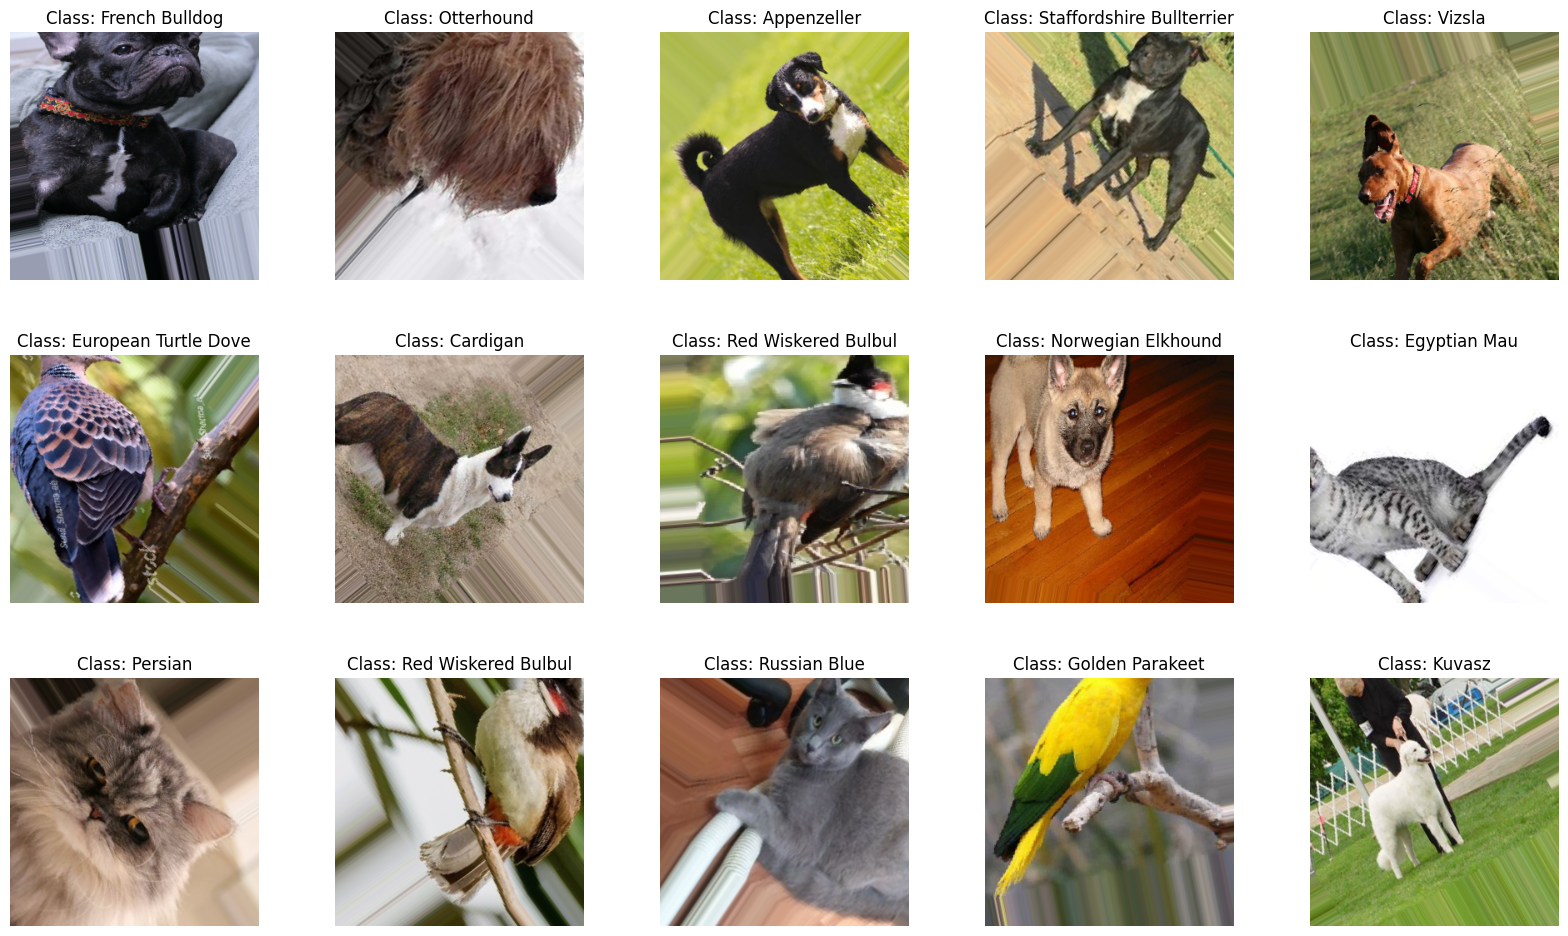

In [23]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")


#Setting up the model used as Transfer Learning (Xception)

In [24]:
# Using Xception

from keras.applications import xception
xception = xception.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(img_size, img_size, 3))

xception.trainable = False

xception.summary()

83683744/83683744 [==============================] - 5s 0us/step
Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                   

Pipelining the pre-trained model

In [25]:
#Model using Xception

inputs = keras.Input(shape=(img_size, img_size, 3))
x = xception(inputs, training=False)
# Rebuild top layers

x = layers.GlobalAveragePooling2D()(x) # Average pooling operation
#x = layers.BatchNormalization()(x) # Introduce batch norm
#x = layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2(l2=1e-4))(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.2)(x)  # Regularize with dropout
# Flattening to final layer 
outputs = layers.Dense(label_count, activation='softmax')(x)
# Instantiate final Keras model with updated inputs and outputs
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 158)               10270     
                                                             

In [26]:
model.compile(optimizer=Adam(learning_rate=2e-3),loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
#OR LOAD THE MODEL USING

from keras.models import load_model
=
model=load_model('Heiwan_DogCat_TL.keras') # << Fill this with the model filepath
model.summary()

In [27]:
import os
checkpoint_path = "/content/checkpoint/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [40]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        acc = logs["accuracy"]
        if acc >= self.threshold:
            self.model.stop_training = True

es_callback = MyThresholdCallback(threshold=0.86)


In [29]:
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [30]:
EPOCHS = 10

history = model.fit(train_generator, 
                    validation_data = validation_generator,
                    epochs=EPOCHS, 
                    verbose=1,
                    callbacks =[cp_callback])

Epoch 1/10
474/474 [==============================] - ETA: 0s - loss: 2.1712 - accuracy: 0.4862
Epoch 1: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 458s 939ms/step - loss: 2.1712 - accuracy: 0.4862 - val_loss: 0.6464 - val_accuracy: 0.8115
Epoch 2/10
474/474 [==============================] - ETA: 0s - loss: 1.1494 - accuracy: 0.6684
Epoch 2: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 433s 913ms/step - loss: 1.1494 - accuracy: 0.6684 - val_loss: 0.5742 - val_accuracy: 0.8189
Epoch 3/10
474/474 [==============================] - ETA: 0s - loss: 1.0480 - accuracy: 0.6932
Epoch 3: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 457s 964ms/step - loss: 1.0480 - accuracy: 0.6932 - val_loss: 0.5273 - val_accuracy: 0.8358
Epoch 4/10
474/474 [==============================] - ETA: 0s - loss: 1.0055 - accuracy: 0.7071
Epoch 4: saving model to /content/checkpoint/cp.ckpt

In [31]:
#save model biar ga nangis kalo hilang T^T 
model.save('Heiwan_DogCat_TLv3.h5')
# Save the entire model as a `.keras` zip archive.
model.save('Heiwan_DogCat_TLv3.keras')

In [ ]:
#Compress the cp dir, then download it as a backup for weights checkpoint
!zip -r /content/checkpoint.zip /content/checkpoint

  adding: content/checkpoint/ (stored 0%)
  adding: content/checkpoint/checkpoint (deflated 38%)
  adding: content/checkpoint/cp.ckpt.data-00000-of-00001 (deflated 7%)
  adding: content/checkpoint/cp.ckpt.index (deflated 80%)


In [33]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**NOW TRY TO FINE-TUNE THE MODEL**

In [35]:
xception.trainable = True
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 158)               10270     
                                                             

In [36]:
model.compile(optimizer=Adam(learning_rate=1e-5),loss="categorical_crossentropy", metrics=['accuracy'])

In [37]:
history = model.fit(train_generator, 
                    validation_data = validation_generator,
                    epochs=5, 
                    verbose=1,
                    callbacks =[cp_callback, es_callback]) #es_callback])

Epoch 1/5
  6/474 [..............................] - ETA: 7:20 - loss: 0.8353 - accuracy: 0.7396

474/474 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.7896
Epoch 1: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 529s 1s/step - loss: 0.6781 - accuracy: 0.7896 - val_loss: 0.4280 - val_accuracy: 0.8653
Epoch 2/5
474/474 [==============================] - ETA: 0s - loss: 0.6059 - accuracy: 0.8120
Epoch 2: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 509s 1s/step - loss: 0.6059 - accuracy: 0.8120 - val_loss: 0.4343 - val_accuracy: 0.8604
Epoch 3/5
474/474 [==============================] - ETA: 0s - loss: 0.5566 - accuracy: 0.8223
Epoch 3: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 514s 1s/step - loss: 0.5566 - accuracy: 0.8223 - val_loss: 0.4318 - val_accuracy: 0.8597
Epoch 4/5
474/474 [==============================] - ETA: 0s - loss: 0.5323 - accuracy: 0.8316
Epoch 4: saving model to /content/checkpoint/cp.ckpt
474/474 [=============

In [38]:
model.save('Heiwan_DogCat_FTv3.keras')
model.save('Heiwan_DogCat_FTv3.h5')

In [41]:
#Let's train it few more times

history = model.fit(train_generator, 
                    validation_data = validation_generator,
                    epochs=5, 
                    verbose=1,
                    callbacks =[cp_callback, es_callback]) #es_callback])

Epoch 1/5
  6/474 [..............................] - ETA: 7:15 - loss: 0.4950 - accuracy: 0.8385

474/474 [==============================] - ETA: 0s - loss: 0.4670 - accuracy: 0.8483
Epoch 1: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 511s 1s/step - loss: 0.4670 - accuracy: 0.8483 - val_loss: 0.4373 - val_accuracy: 0.8685
Epoch 2/5
474/474 [==============================] - ETA: 0s - loss: 0.4519 - accuracy: 0.8544
Epoch 2: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 504s 1s/step - loss: 0.4519 - accuracy: 0.8544 - val_loss: 0.4285 - val_accuracy: 0.8685
Epoch 3/5
474/474 [==============================] - ETA: 0s - loss: 0.4341 - accuracy: 0.8577
Epoch 3: saving model to /content/checkpoint/cp.ckpt
474/474 [==============================] - 516s 1s/step - loss: 0.4341 - accuracy: 0.8577 - val_loss: 0.4229 - val_accuracy: 0.8706
Epoch 4/5
474/474 [==============================] - ETA: 0s - loss: 0.4079 - accuracy: 0.8703
Epoch 4: saving model to /content/checkpoint/cp.ckpt
474/474 [=============

In [50]:
# Evaluate the model
scores = model.evaluate(test_generator)
print("%s%s: %.2f%%" % ("Evaluating the ",model.metrics_names[1], scores[1]*100))

30/30 [==============================] - 8s 243ms/step - loss: 0.4995 - accuracy: 0.8692
Evaluating the accuracy: 86.92%


In [43]:
# Save the entire model as a SavedModel
!mkdir -p saved_model
model.save('saved_model/Heiwan_FineTuned')
model.save('Heiwan_FineTuned_86.keras')
model.save('Heiwan_FineTuned_86.h5')

In [44]:
!zip -r /content/Heiwan_FineTuned_86.zip /content/saved_model/Heiwan_FineTuned

  adding: content/saved_model/Heiwan_FineTuned/ (stored 0%)
  adding: content/saved_model/Heiwan_FineTuned/variables/ (stored 0%)
  adding: content/saved_model/Heiwan_FineTuned/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: content/saved_model/Heiwan_FineTuned/variables/variables.index (deflated 79%)
  adding: content/saved_model/Heiwan_FineTuned/assets/ (stored 0%)
  adding: content/saved_model/Heiwan_FineTuned/fingerprint.pb (stored 0%)
  adding: content/saved_model/Heiwan_FineTuned/saved_model.pb (deflated 92%)
  adding: content/saved_model/Heiwan_FineTuned/keras_metadata.pb (deflated 96%)


In [47]:
# Copying colab files to G.drive
#from google.colab import drive
#drive.mount('/content/drive')

# Cop
#!cp /content/Heiwan_FineTuned_86.h5 /content/drive/MyDrive/CAPS
!cp /content/Heiwan_FineTuned_86.keras /content/drive/MyDrive/CAPS
!cp /content/Heiwan_FineTuned_86.zip /content/drive/MyDrive/CAPS

Text(0.5, 1.0, 'Loss Curves')

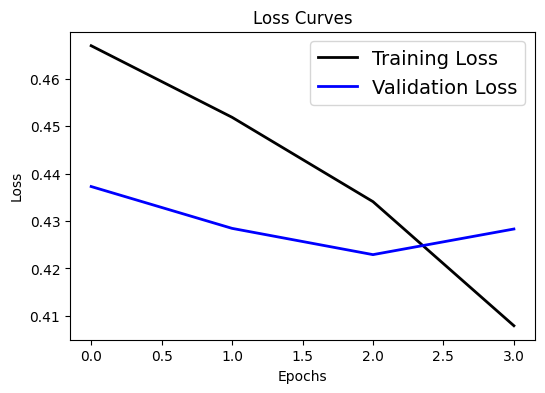

In [48]:
# Plot Loss 
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

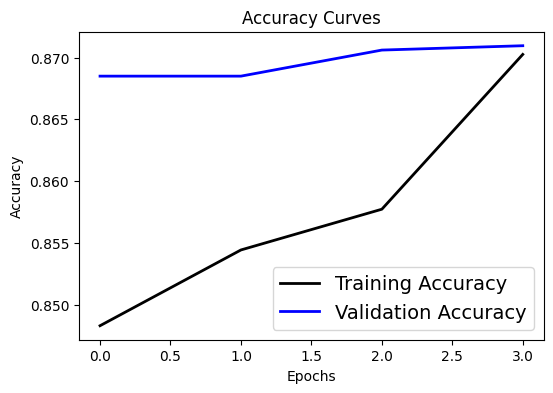

In [49]:
# Plot Accuracy
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [56]:
validation_generator.class_indices

{'Abyssinian': 0,
 'Affenpinscher': 1,
 'Afghan Hound': 2,
 'African Hunting Dog': 3,
 'Airedale': 4,
 'Alexandrine Parakeet': 5,
 'American Bobtail': 6,
 'American Shorthair': 7,
 'American Staffordshire Terrier': 8,
 'Appenzeller': 9,
 'Australian Terrier': 10,
 'Basenji': 11,
 'Basset': 12,
 'Beagle': 13,
 'Bedlington Terrier': 14,
 'Bengal': 15,
 'Bernese Mountain Dog': 16,
 'Birman': 17,
 'Black And Tan Coonhound': 18,
 'Blenheim Spaniel': 19,
 'Bloodhound': 20,
 'Bluetick': 21,
 'Bombay': 22,
 'Border Collie': 23,
 'Border Terrier': 24,
 'Borzoi': 25,
 'Boston Bull': 26,
 'Bouvier Des Flandres': 27,
 'Boxer': 28,
 'Brabancon Griffon': 29,
 'Briard': 30,
 'British Shorthair': 31,
 'Brittany Spaniel': 32,
 'Bull Mastiff': 33,
 'Cairn': 34,
 'Canary': 35,
 'Cardigan': 36,
 'Chesapeake Bay Retriever': 37,
 'Chihuahua': 38,
 'Chow': 39,
 'Clumber': 40,
 'Cockatoo': 41,
 'Cocker Spaniel': 42,
 'Collie': 43,
 'Curly Coated Retriever': 44,
 'Dandie Dinmont': 45,
 'Dhole': 46,
 'Dingo': 4

In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_size, img_size),
        color_mode="rgb",
        shuffle = False,
        class_mode='categorical',
        batch_size=1)

test_fn = test_generator.filenames
nb_samples = len(test_fn)

predict = model.predict(test_generator,steps = nb_samples)

Found 948 images belonging to 158 classes.
948/948 [==============================] - 11s 11ms/step


In [75]:
predicted = np.argmax(predict, axis = 1)
print(predicted)

[ 94   0   0   0   0   0   1   1   1   1   1   1   2   2   2   2   2   2
   3   3   3   3   3   3  37   4   4   4   4   4   5   5  49   5   5   5
   6 147  31   6 148  50  94   7   7  50   7   7 139   8   8 139   8   8
   9   9   9  68   9   9  10 156  10  10  10 156  11  11  11  11  11  11
  12  12  12  12  12  12  13  13  13  13  51  13  14  14  14  14  14  14
  15  15  15  15  15   0   9  16  16  16  16   9  17  17  17  17  17  31
  18  18  18  18  18  18  19  19  19  19  19  19  20  20  20  20  20  18
  21  21  21  21  21  21  22  22  22  22  22  22  23  23  23  23  23  23
  24  24  24  24  24  24  67  25  25  25  25  67  26  26  26  26  26  26
  27  27  27  27  27 101  28  28  28  28  28  28  58  29  29  29   1  29
  30  30  30  30  30  30   6  31  31  31  31  31  32 152  32  32  32  32
  33  33  28  33  33  33  34  34  34  34  34  34  35  35  35  35  35  35
  36  36  36  36  36  26  37  37  37  37  37  37  38  38  38  38  38  38
  39  39  39  39  39  39  40  40  40  40  40  40  4

In [73]:
expected = test_generator.classes.tolist()
test_generator.classes

array([  0,   0,   0,   0,   0,   0,   1,   1,   1,   1,   1,   1,   2,
         2,   2,   2,   2,   2,   3,   3,   3,   3,   3,   3,   4,   4,
         4,   4,   4,   4,   5,   5,   5,   5,   5,   5,   6,   6,   6,
         6,   6,   6,   7,   7,   7,   7,   7,   7,   8,   8,   8,   8,
         8,   8,   9,   9,   9,   9,   9,   9,  10,  10,  10,  10,  10,
        10,  11,  11,  11,  11,  11,  11,  12,  12,  12,  12,  12,  12,
        13,  13,  13,  13,  13,  13,  14,  14,  14,  14,  14,  14,  15,
        15,  15,  15,  15,  15,  16,  16,  16,  16,  16,  16,  17,  17,
        17,  17,  17,  17,  18,  18,  18,  18,  18,  18,  19,  19,  19,
        19,  19,  19,  20,  20,  20,  20,  20,  20,  21,  21,  21,  21,
        21,  21,  22,  22,  22,  22,  22,  22,  23,  23,  23,  23,  23,
        23,  24,  24,  24,  24,  24,  24,  25,  25,  25,  25,  25,  25,
        26,  26,  26,  26,  26,  26,  27,  27,  27,  27,  27,  27,  28,
        28,  28,  28,  28,  28,  29,  29,  29,  29,  29,  29,  3

In [74]:
print(expected)

[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 43, 43, 43, 43, 43, 43, 44,

In [83]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

confusion_matrix = confusion_matrix(expected, predicted)
accuracyscore = accuracy_score(expected, predicted)

In [84]:
print(accuracyscore)

0.869198312236287


In [58]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(299, 299))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images)
  classes = np.argmax(predictions, axis = 1)

  print(classes)

Saving kakatua.jpg to kakatua.jpg
1/1 [==============================] - 0s 81ms/step
[41]


# **END .**
Dibawah keknya gak kepake fan


In [ ]:
#retrain model  
from keras.models import load_model
from keras import callbacks
modelv2=load_model('Heiwan_DogCat.h5')
modelv2.summary()

#from keras.models import load_model
#model = load_model('/content/Heiwan_DogCat.h5')

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 lambda_3 (Lambda)           (None, 299, 299, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 conv2d_473 (Conv2D)         (None, 8, 8, 32)          262176    
                                                                 
 global_average_pooling2d_3   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_3 (Flatten)         (None, 32)                0         
                                                           

In [ ]:
modelv2.compile(optimizer=Adam(learning_rate=0.01),loss="categorical_crossentropy", metrics=['accuracy'])
# lr di naikan 0.01 langsung error parameter nya
# diberi callback juga tidak membantu
# hasil retrain tertinggi berada di angka 51% di epoch pertama

In [ ]:
history = modelv2.fit(train_generator,validation_data = validation_generator,epochs = 2,batch_size=128, callbacks = [cp_callback])

Epoch 1/3
681/681 [==============================] - ETA: 0s - loss: 1.8708 - accuracy: 0.5096
Epoch 1: saving model to /content/checkpoint/cp.ckpt
681/681 [==============================] - 665s 976ms/step - loss: 1.8708 - accuracy: 0.5096 - val_loss: 1.8607 - val_accuracy: 0.5224
Epoch 2/3
681/681 [==============================] - ETA: 0s - loss: 1.8521 - accuracy: 0.5141
Epoch 2: saving model to /content/checkpoint/cp.ckpt
681/681 [==============================] - 664s 975ms/step - loss: 1.8521 - accuracy: 0.5141 - val_loss: 1.7775 - val_accuracy: 0.5364
Epoch 3/3
681/681 [==============================] - ETA: 0s - loss: 1.8400 - accuracy: 0.5138
Epoch 3: saving model to /content/checkpoint/cp.ckpt
681/681 [==============================] - 633s 930ms/step - loss: 1.8400 - accuracy: 0.5138 - val_loss: 1.7999 - val_accuracy: 0.5233


In [ ]:
#save model biar ga nangis kalo hilang T^T 
modelv2.save('Heiwan_DogCatV2.h5')
# Save the entire model as a `.keras` zip archive.
modelv2.save('Heiwan_DogCatV2.keras')

In [ ]:
#Saving the cp weights
!zip -r /content/Heiwan_DogCat.zip /content/saved_model/Heiwan_DogCatv2

In [ ]:
# Save the entire model as a SavedModel and its checkpoint
!mkdir -p saved_model
modelv2.save('saved_model/Heiwan_DogCatv2')

!zip -r /content/checkpoint.zip /content/checkpoint
!zip -r /content/Heiwan_DogCatv2.zip /content/saved_model/Heiwan_DogCatv2

#from google.colab import files
#files.download("/content/model_backupan.zip")

  adding: content/checkpoint/ (stored 0%)
  adding: content/checkpoint/checkpoint (deflated 38%)
  adding: content/checkpoint/cp.ckpt.data-00000-of-00001 (deflated 9%)
  adding: content/checkpoint/cp.ckpt.index (deflated 79%)
	zip warning: name not matched: /content/saved_model/Heiwan_DogCatv2

zip error: Nothing to do! (try: zip -r /content/Heiwan_DogCatv2.zip . -i /content/saved_model/Heiwan_DogCatv2)


In [ ]:
modelv2.save('saved_model/Heiwan_DogCatv2')
!zip -r /content/Heiwan_DogCatv2.zip /content/saved_model/Heiwan_DogCatv2

  adding: content/saved_model/Heiwan_DogCatv2/ (stored 0%)
  adding: content/saved_model/Heiwan_DogCatv2/saved_model.pb (deflated 92%)
  adding: content/saved_model/Heiwan_DogCatv2/keras_metadata.pb (deflated 96%)
  adding: content/saved_model/Heiwan_DogCatv2/variables/ (stored 0%)
  adding: content/saved_model/Heiwan_DogCatv2/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/saved_model/Heiwan_DogCatv2/variables/variables.index (deflated 76%)
  adding: content/saved_model/Heiwan_DogCatv2/assets/ (stored 0%)
  adding: content/saved_model/Heiwan_DogCatv2/fingerprint.pb (stored 0%)


In [ ]:
# Plot Loss 
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

In [ ]:
# Plot Accuracy
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)